In [1]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import cmocean
import numpy as np
import cartopy.crs           as ccrs
import matplotlib.gridspec   as gridspec
import matplotlib.ticker as mticker
import cartopy.feature as cf
from matplotlib.lines import Line2D 
from scipy.interpolate import griddata
from matplotlib.lines import Line2D

In [2]:
lonmin, lonmax, latmin, latmax = 1,5,38,41

### IMPORT DATA

SST

In [3]:
# data_path = '/home/everger/ONEDRIVE/SWOT/imatges/SST/2023/'
data_path = '../../SWOT/imatges/SST/2023/'

files = glob.glob(data_path+'*.nc')
files = np.sort(files)[5]
files

'../../SWOT/imatges/SST/2023/20230426000000-GOS-L3S_GHRSST-SSTsubskin-night_SST_UHR_NRT-MED-v02.0-fv01.0.nc'

In [4]:
dsSST = xr.open_dataset(files)
time_SST = dsSST['time']
lon_SST_all = dsSST['lon']; lat_SST_all = dsSST['lat'];
mask_lon = (lon_SST_all>lonmin-0.1) & (lon_SST_all<lonmax+0.1)
mask_lat = (lat_SST_all>latmin-0.1) & (lat_SST_all<latmax+0.1)
lon_SST = lon_SST_all[mask_lon].values; lat_SST = lat_SST_all[mask_lat].values;
SST = dsSST['adjusted_sea_surface_temperature'].load()[0,mask_lat,mask_lon].values

SWOT

In [5]:
# path = '/home/everger/ONEDRIVE/SWOT/SWOT_data_L3/v01/expert/'
path = '../../SWOT/SWOT_data_L3/v01/expert/'
files = glob.glob(path+'*.nc')
file = np.sort(files)[16]
file

'../../SWOT/SWOT_data_L3/v01/expert/SWOT_L3_LR_SSH_Expert_502_016_20230426T062612_20230426T071716_v1.0.nc'

In [6]:
ds_SWOT = xr.open_dataset(file)

# Filter dataset by longitude and latitude bounds
ds_SWOT = ds_SWOT.where((ds_SWOT['longitude'] < lonmax) & (ds_SWOT['longitude'] > lonmin) &
                        (ds_SWOT['latitude'] < latmax) & (ds_SWOT['latitude'] > latmin), drop=True)

ds_SWOT

<xarray.Dataset>
Dimensions:               (num_lines: 185, num_pixels: 69, num_nadir: 1311)
Coordinates:
    latitude              (num_lines, num_pixels) float64 41.24 41.24 ... 37.74
    longitude             (num_lines, num_pixels) float64 2.408 2.385 ... 1.833
Dimensions without coordinates: num_lines, num_pixels, num_nadir
Data variables: (12/18)
    time                  (num_lines, num_pixels) datetime64[ns] NaT NaT ... NaT
    mdt                   (num_lines, num_pixels) float64 nan nan ... nan nan
    ssha                  (num_lines, num_pixels) float64 nan nan ... nan nan
    ssha_noiseless        (num_lines, num_pixels) float64 nan nan ... nan nan
    ssha_unedited         (num_lines, num_pixels) float64 nan nan ... nan nan
    quality_flag          (num_lines, num_pixels) float32 nan nan ... nan nan
    ...                    ...
    ugosa                 (num_lines, num_pixels) float64 nan nan ... nan nan
    vgosa                 (num_lines, num_pixels) float64 nan nan ... nan nan
    sigma0                (num_lines, num_pixels) float64 nan nan ... nan nan
    cross_track_distance  (num_pixels, num_lines) float64 nan nan ... nan nan
    i_num_line            (num_nadir, num_lines, num_pixels) float32 nan ... nan
    i_num_pixel           (num_nadir, num_lines, num_pixels) float32 nan ... nan
Attributes: (12/42)
    Conventions:                     CF-1.7
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Swath
    comment:                         Sea Surface Height measured by Altimetry
    geospatial_lat_units:            degrees_north
    geospatial_lon_units:            degrees_east
    ...                              ...
    geospatial_lat_min:              -78.272132
    geospatial_lat_max:              78.272321
    geospatial_lon_min:              6.5e-05
    geospatial_lon_max:              359.999908
    data_used:                       SWOT KaRIn L2_LR_SSH PGC0 (NASA/CNES). D...
    doi:                             https://doi.org/10.24400/527896/A01-2023...

DUACS


In [7]:
# data_path = '/home/everger/ONEDRIVE/SWOT/imatges/SSH/reprocessed/'
data_path = '../../SWOT/imatges/SSH/reprocessed/'

files_duacs = glob.glob(data_path+'*.nc')
files_duacs = np.sort(files_duacs)[0]
files_duacs

# per dia 25/04:
# files_duacs = data_path + "dt_europe_allsat_phy_l4_20230425_20241024.nc"

'../../SWOT/imatges/SSH/reprocessed/cmems_obs-sl_eur_phy-ssh_my_allsat-l4-duacs-0.125deg_P1D_20230426.nc'

In [8]:
ds_DUACS= xr.open_dataset(files_duacs)

In [9]:
ds_DUACS = ds_DUACS.where((ds_DUACS['longitude'] < lonmax) & (ds_DUACS['longitude'] > lonmin) &
                            (ds_DUACS['latitude'] < latmax) & (ds_DUACS['latitude'] > latmin), drop=True)

In [10]:
# meshgrid lon/lat duacs
lon_DUACS = ds_DUACS['longitude'].values
lat_DUACS = ds_DUACS['latitude'].values
lon_DUACS, lat_DUACS = np.meshgrid(lon_DUACS, lat_DUACS)


DRIFTER

Amb oscil·lacions inercials filtrades:

In [11]:
#filedir = 'C:/Users/Usuario/OneDrive - Universitat de les Illes Balears/Data/Data/in_situ/analyses/drifters/SVPB/'
filedir = '../../SWOT/drifters/filtered/SVPB/'

In [12]:
#42: 26/04
drifter_num = '42'.zfill(3)
url_01 = filedir + "drifter-svpb" + drifter_num + "_inertial_osc_filt.nc"
ds_svp042 = xr.open_dataset(url_01)

#41: 26/04
drifter_num = '41'.zfill(3)
url_01 = filedir + "drifter-svpb" + drifter_num + "_inertial_osc_filt.nc"
ds_svp041 = xr.open_dataset(url_01)

#40: 26/04
drifter_num = '40'.zfill(3)
url_01 = filedir + "drifter-svpb" + drifter_num + "_inertial_osc_filt.nc"
ds_svp040 = xr.open_dataset(url_01)

#39: 26/04
drifter_num = '39'.zfill(3)
url_01 = filedir + "drifter-svpb" + drifter_num + "_inertial_osc_filt.nc"
ds_svp039 = xr.open_dataset(url_01)

# #38: 26/04
drifter_num = '38'.zfill(3)
url_01 = filedir + "drifter-svpb" + drifter_num + "_inertial_osc_filt.nc"
ds_svp038 = xr.open_dataset(url_01)

#35: 23/02
drifter_num = '35'.zfill(3)
url_01 = filedir + "drifter-svpb" + drifter_num + "_inertial_osc_filt.nc"
ds_svp035 = xr.open_dataset(url_01)

In [13]:
ds_svp_leg1 = [ds_svp035, ds_svp038, ds_svp039, ds_svp040, ds_svp041, ds_svp042]

In [14]:
str(ds_SWOT.time[10][50].values - np.timedelta64(4, 'D'))

'2023-04-22T06:39:49.176635776'

***

ALONG-TRACK


In [18]:
file_alt  = "nrt_europe_al_phy_l3_1hz_20230425_20230516.nc" # 25 abril

file_sent = "nrt_europe_s6a_hr_phy_l3_1hz_20230426_20230517.nc" # 26 abril

# open the file
ds_ALT = xr.open_dataset(file_alt)
ds_sent = xr.open_dataset(file_sent)

ds_ALT

<xarray.Dataset>
Dimensions:         (time: 2016)
Coordinates:
  * time            (time) datetime64[ns] 2023-04-25T03:35:20.231099904 ... 2...
    longitude       (time) float64 ...
    latitude        (time) float64 ...
Data variables:
    cycle           (time) int16 ...
    track           (time) int16 ...
    sla_filtered    (time) float32 ...
    sla_unfiltered  (time) float32 ...
    flag            (time) float32 ...
    dac             (time) float32 ...
    ocean_tide      (time) float32 ...
    internal_tide   (time) float32 ...
    lwe             (time) float32 ...
    mdt             (time) float32 ...
Attributes: (12/44)
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Swath
    comment:                         Sea Surface Height measured by altimeter...
    contact:                         servicedesk.cmems@mercator-ocean.eu
    creator_email:                   servicedesk.cmems@mercator-ocean.eu
    ...                              ...
    summary:                         SSALTO/DUACS Near-Real-Time Level-3 sea ...
    time_coverage_duration:          P17H11M25.495030S
    time_coverage_end:               2023-04-25T20:46:45Z
    time_coverage_resolution:        P1S
    time_coverage_start:             2023-04-25T03:35:20Z
    title:                           NRT Altika Drifting Phase European Seas ...

In [16]:
ds_ALT = ds_ALT.where((ds_ALT['longitude'] < lonmax) & (ds_ALT['longitude'] > lonmin) &
                            (ds_ALT['latitude'] < latmax) & (ds_ALT['latitude'] > latmin), drop=True)

ds_sent = ds_sent.where((ds_sent['longitude'] < lonmax) & (ds_sent['longitude'] > lonmin) &
                            (ds_sent['latitude'] < latmax) & (ds_sent['latitude'] > latmin), drop=True)

In [17]:
lon_ALT = ds_ALT['longitude'].values
lat_ALT = ds_ALT['latitude'].values
sla_filtered_ALT = ds_ALT.sla_filtered.values
sla_unfiltered_ALT = ds_ALT.sla_unfiltered.values

lon_sent = ds_sent['longitude'].values
lat_sent = ds_sent['latitude'].values
sla_filtered_sent = ds_sent.sla_filtered.values

/home/everger/anaconda3/lib/python3.11/site-packages/cartopy/mpl/geoaxes.py:1604: UserWarning: The following kwargs were not used by contour: 'label'
  result = super().contour(*args, **kwargs)
/tmp/ipykernel_225023/1776788662.py:189: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


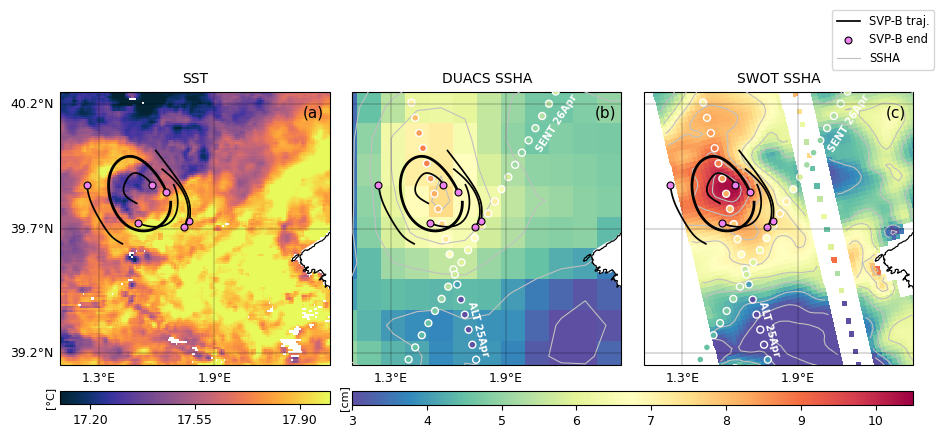

In [18]:
fig = plt.figure(figsize=(11, 25))
gs = gridspec.GridSpec(1, 3, width_ratios=[1.1,1.1, 1.1], wspace=0.084)
fontsize = 9

# Set extent of the map
extent = [1.1, 2.5, 39.15, 40.25]


# ####### AX1 #######
ax1 = plt.subplot(gs[0], projection=ccrs.Mercator())
ax1.set_extent(extent)

coast = cf.GSHHSFeature(scale='full')
ax1.add_feature(coast, zorder=2001, linewidth=0.8)
# land color
ax1.add_feature(cf.LAND, zorder=2000, edgecolor='white', facecolor='white')

# Add gridlines
gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0.2, color='black',zorder=1999)
gl.xlocator = mticker.FixedLocator([1.3, 1.9, 2.5])
gl.ylocator = mticker.FixedLocator([39.2, 39.7, 40.2])
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 9, 'color': 'black'}
gl.ylabel_style = {'size': 9, 'color': 'black'}

# SST
plot1 = ax1.pcolormesh(lon_SST, lat_SST, SST - 273.15, transform=ccrs.PlateCarree(), cmap=cmocean.cm.thermal, vmin=17.1, vmax=18, zorder=0)

# plot contours
# CS = ax1.contour(lon_SST, lat_SST, SST - 273.15, colors='silver', linewidths=0.8, vmin=17.1, vmax=18, levels= 6, transform=ccrs.PlateCarree(), zorder=6)

# Drifters
dd1 = str(ds_SWOT.time[10][40].values - np.timedelta64(3, 'D'))
dd2 = str(ds_SWOT.time[10][40].values + np.timedelta64(3, 'D'))

# Plot trajectory segments
for ii, ds in enumerate(ds_svp_leg1[1:]):
    ds_s = ds.sel(time=slice(dd1, dd2))
    if ds_s.time.size == 0:
        print('No trajectory segment on these days')
    else:
        color = 'black'  # Change drifter color to a more distinct one
        ax1.plot(ds_s.LON, ds_s.LAT, linewidth=1.25, transform=ccrs.PlateCarree(), color=color, zorder=500, label='SVP-B traj.' if ii == 2 else '')
        ax1.scatter(ds_s.LON[-1].values, ds_s.LAT[-1].values, s=25, color='violet', edgecolor='black', zorder=500, linewidths=0.8, transform=ccrs.PlateCarree())

# Plot the svp 35 in another color
ds_s = ds_svp_leg1[0].sel(time=slice(dd1, dd2))
ax1.plot(ds_s.LON, ds_s.LAT, linewidth=2, transform=ccrs.PlateCarree(), color='black', zorder=500, label='SVP-B traj. 35')
ax1.scatter(ds_s.LON[-1].values, ds_s.LAT[-1].values, s=25, color='violet', edgecolor='black', zorder=500, linewidths=0.8, label='SVP-B end', transform=ccrs.PlateCarree())

ax1.set_title('SST', fontsize=fontsize + 1)

# Add horizontal colorbar for ax1
cbar1 = plt.colorbar(plot1, ax=ax1, orientation='horizontal', fraction=0.01, pad=0.013)
title_text = '[°C]'
cbar1.ax.text(17.05, -0.25, title_text, fontsize=fontsize - 1,  rotation=90)
cbar1.ax.tick_params(labelsize=fontsize)
# change number of ticks
cbar1.set_ticks([17.2, 17.55, 17.9])

# ####### AX2 #######
ax2 = plt.subplot(gs[2], projection=ccrs.Mercator())
ax2.set_extent(extent)

ax2.add_feature(coast, zorder=2001, linewidth=0.8)
# land color
ax2.add_feature(cf.LAND, zorder=2000, edgecolor='white', facecolor='white')

gl = ax2.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0.2, color='black', zorder=1999)
gl.xlocator = mticker.FixedLocator([1.3, 1.9, 2.5])
gl.ylocator = mticker.FixedLocator([39.2, 39.7, 40.2])
gl.top_labels = False
gl.right_labels = False
gl.left_labels = False
gl.xlabel_style = {'size': 9, 'color': 'black'}
gl.ylabel_style = {'size': 9, 'color': 'black'}

# SWOT
plot2 = ax2.pcolormesh(ds_SWOT.longitude, ds_SWOT.latitude, ds_SWOT.ssha_noiseless * 100,
                       transform=ccrs.PlateCarree(), vmin=3, vmax=10.5, cmap='Spectral_r')

# PLOT ALTIKA
ax2.scatter(lon_ALT, lat_ALT, 25,  c=sla_filtered_ALT* 100, transform=ccrs.PlateCarree(), vmin=3, vmax=10, cmap='Spectral_r', zorder=500, edgecolors='white')
# PLO SENTINEL
ax2.scatter(lon_sent, lat_sent, 25,  c=sla_filtered_sent* 100, transform=ccrs.PlateCarree(), vmin=3, vmax=10, cmap='Spectral_r', zorder=500, edgecolors='white')

CS = ax2.contour(ds_SWOT.longitude, ds_SWOT.latitude, ds_SWOT.ssha_noiseless * 100, colors='silver', linewidths=0.8, vmin=0, vmax=10, levels=np.linspace(0, 10, 11), transform=ccrs.PlateCarree(), zorder=6)


# Drifters
for ii, ds in enumerate(ds_svp_leg1[1:]):
    ds_s = ds.sel(time=slice(dd1, dd2))
    if ds_s.time.size == 0:
        print('No trajectory segment on these days')
    else:
        color = 'black'  # Change drifter color to a more distinct one
        ax2.plot(ds_s.LON, ds_s.LAT, linewidth=1.25, transform=ccrs.PlateCarree(), color=color, zorder=500, label='SVP-B traj.' if ii == 2 else '')
        ax2.scatter(ds_s.LON[-1].values, ds_s.LAT[-1].values, s=25, color='violet', edgecolor='black', zorder=500, linewidths=0.8, transform=ccrs.PlateCarree())

# Plot the svp 35 in another color
ds_s = ds_svp_leg1[0].sel(time=slice(dd1, dd2))
ax2.plot(ds_s.LON, ds_s.LAT, linewidth=2, transform=ccrs.PlateCarree(), color='black', zorder=500)
ax2.scatter(ds_s.LON[-1].values, ds_s.LAT[-1].values, s=25, color='violet', edgecolor='black', zorder=500, linewidths=0.8, label='SVP-B end', transform=ccrs.PlateCarree())

ax2.set_title('SWOT SSHA', fontsize=fontsize + 1)

# ####### AX3 #######
ax3 = plt.subplot(gs[1], projection=ccrs.Mercator())
ax3.set_extent(extent)

ax3.add_feature(coast, zorder=2001, linewidth=0.8)
# land color
ax3.add_feature(cf.LAND, zorder=2000, edgecolor='white', facecolor='white')

gl = ax3.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0.2, color='black',zorder=1999)
gl.xlocator = mticker.FixedLocator([1.3, 1.9, 2.5])
gl.ylocator = mticker.FixedLocator([39.2, 39.7, 40.2])
gl.top_labels = False
gl.right_labels = False
gl.left_labels = False
gl.xlabel_style = {'size': 9, 'color': 'black'}
gl.ylabel_style = {'size': 9, 'color': 'black'}

# DUACS
plot3 = ax3.pcolormesh(lon_DUACS, lat_DUACS, ds_DUACS.sla.squeeze() * 100,
                       transform=ccrs.PlateCarree(), vmin=3, vmax=10, cmap='Spectral_r')

# DUACS contours
CS3 = ax3.contour(lon_DUACS, lat_DUACS, ds_DUACS.sla.squeeze() * 100, colors='silver', linewidths=0.8, vmin=0, vmax=10, levels=np.linspace(0, 10, 11), transform=ccrs.PlateCarree(), zorder=5, label= 'SSHA')

# Add proxy artist for the legend
contour_legend = Line2D([0], [0], color='silver', linewidth=0.8, label='SSHA')

# PLOT ALTIKA
ax3.scatter(lon_ALT, lat_ALT, 25,  c=sla_filtered_ALT* 100, transform=ccrs.PlateCarree(), vmin=3, vmax=10, cmap='Spectral_r', zorder=500, edgecolors='white')
# PLOT SENTINEL
ax3.scatter(lon_sent, lat_sent, 25,  c=sla_filtered_sent* 100, transform=ccrs.PlateCarree(), vmin=3, vmax=10, cmap='Spectral_r', zorder=500, edgecolors='white')

# add text "ALT" and "SENT"
ax2.text(1.69, 39.19, 'ALT 25Apr', fontsize=7.2, color='w', fontweight ='bold', transform=ccrs.PlateCarree(), rotation = 285, zorder=1000)
ax2.text(2.05, 40.01, 'SENT 26Apr', fontsize=7.2, color='w', fontweight ='bold',transform=ccrs.PlateCarree(), rotation = 57, zorder=1000)

# add text "ALT" and "SENT"
ax3.text(1.69, 39.19, 'ALT 25Apr', fontsize=7.2, color='w', fontweight ='bold', transform=ccrs.PlateCarree(), rotation = 285, zorder=1000)
ax3.text(2.05, 40.01, 'SENT 26Apr', fontsize=7.2, color='w', fontweight ='bold',transform=ccrs.PlateCarree(), rotation = 57, zorder=1000)

# Drifters for ax3
for ii, ds in enumerate(ds_svp_leg1[1:]):
    ds_s = ds.sel(time=slice(dd1, dd2))
    if ds_s.time.size == 0:
        print('No trajectory segment on these days')
    else:
        color = 'black'  # Change drifter color to a more distinct one
        ax3.plot(ds_s.LON, ds_s.LAT, linewidth=1.25, transform=ccrs.PlateCarree(), color=color, zorder=500, label='SVP-B traj.' if ii == 2 else '')
        ax3.scatter(ds_s.LON[-1].values, ds_s.LAT[-1].values, s=25, color='violet', edgecolor='black', zorder=500, linewidths=0.8, transform=ccrs.PlateCarree())

# Plot the svp 35 in another color
ds_s = ds_svp_leg1[0].sel(time=slice(dd1, dd2))
ax3.plot(ds_s.LON, ds_s.LAT, linewidth=2, transform=ccrs.PlateCarree(), color='black', zorder=500)
ax3.scatter(ds_s.LON[-1].values, ds_s.LAT[-1].values, s=25, color='violet', edgecolor='black', zorder=500, linewidths=0.8, label='SVP-B end', transform=ccrs.PlateCarree())

ax3.set_title('DUACS SSHA', fontsize=fontsize + 1)

cbar2 = plt.colorbar(plot2, ax=[ax2, ax3], orientation='horizontal', fraction=0.01, pad=0.013, aspect=38)
# Create a title on the left side
title_text = '[cm]'
cbar2.ax.text(2.89, 0.5, title_text, fontsize=fontsize - 1, ha='center', va='center', rotation=90)
# set the ticks size
cbar2.ax.tick_params(labelsize=fontsize)

# Create custom legend entries
handles, labels = ax3.get_legend_handles_labels()

# Append SSHA proxy entry
handles.append(contour_legend)
labels.append('SSHA')

# Legend for ax2
ax2.legend(handles=handles, labels=labels, loc='upper right', fontsize=fontsize - 0.7, facecolor='white', bbox_to_anchor=(1.1, 1.32))


# Add (a), (b), (c) labels
ax1.text(0.9, 0.95, '(a)', transform=ax1.transAxes, fontsize=fontsize + 2, va='top', zorder=1000)
ax2.text(0.9, 0.95, '(c)', transform=ax2.transAxes, fontsize=fontsize + 2, va='top', zorder=1000)
ax3.text(0.9, 0.95, '(b)', transform=ax3.transAxes, fontsize=fontsize + 2, va='top', zorder=1000)


plt.tight_layout()

# plt.savefig('/home/everger/ONEDRIVE/SWOT/figure2_with_along_tr_v2.png', dpi=300, bbox_inches='tight')

**DIA 25/04**

swot


In [19]:
# open swot file for 25/04
file1 = np.sort(files)[14]
file1

'../../SWOT/SWOT_data_L3/v01/expert/SWOT_L3_LR_SSH_Expert_501_016_20230425T063534_20230425T072638_v1.0.nc'

In [20]:
ds_SWOT1 = xr.open_dataset(file1)

# Filter dataset by longitude and latitude bounds
ds_SWOT1 = ds_SWOT1.where((ds_SWOT1['longitude'] < lonmax) & (ds_SWOT1['longitude'] > lonmin) &
                        (ds_SWOT1['latitude'] < latmax) & (ds_SWOT1['latitude'] > latmin), drop=True)

duacs


In [21]:
data_path = '../../SWOT/imatges/SSH/reprocessed/'

# per dia 25/04:
file1_duacs = data_path + "dt_europe_allsat_phy_l4_20230425_20241024.nc"


In [22]:
ds_DUACS1= xr.open_dataset(file1_duacs)

In [23]:
ds_DUACS1 = ds_DUACS1.where((ds_DUACS1['longitude'] < lonmax) & (ds_DUACS1['longitude'] > lonmin) &
                            (ds_DUACS1['latitude'] < latmax) & (ds_DUACS1['latitude'] > latmin), drop=True)

In [24]:
# meshgrid lon/lat duacs
lon_DUACS1 = ds_DUACS1['longitude'].values
lat_DUACS1 = ds_DUACS1['latitude'].values
lon_DUACS1, lat_DUACS1 = np.meshgrid(lon_DUACS1, lat_DUACS1)


In [25]:
# interpolate swot and duacs to the points lon_ALT, lat_ALT
ssha_swot = ds_SWOT1.ssha_noiseless
ssha_swot_interp = griddata((ds_SWOT1.longitude.values.flatten(), ds_SWOT1.latitude.values.flatten()), ssha_swot.values.flatten(), (lon_ALT, lat_ALT), method='linear')

# interpolate ssha_duacs to the points lon_ALT, lat_ALT
ssha_duacs = ds_DUACS1.sla
ssha_duacs_interp = griddata((lon_DUACS1.flatten(), lat_DUACS1.flatten()), ssha_duacs.values.flatten(), (lon_ALT, lat_ALT), method='linear')


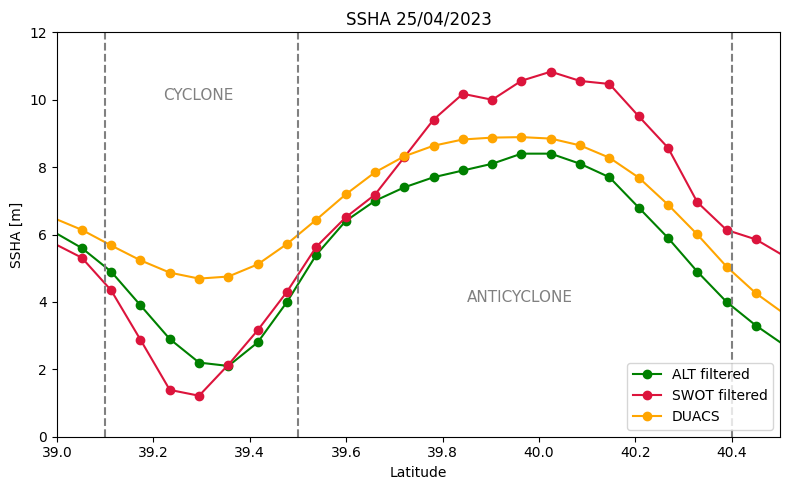

In [26]:
# plot sla in function of lat
plt.figure(figsize=(8, 5))
plt.plot(lat_ALT, sla_filtered_ALT*100, '-o',   c='green', label = 'ALT filtered')
plt.plot(lat_ALT, ssha_swot_interp*100, '-o',  c='crimson', label = 'SWOT filtered')
plt.plot(lat_ALT, ssha_duacs_interp*100, '-o',  c='orange', label = 'DUACS')

plt.xlim([39, 40.5])
plt.xlabel('Latitude')
plt.ylabel('SSHA [m]')
plt.title('SSHA 25/04/2023')

# add box in the plot form latitudes 39.5 to 40
plt.axvline(x=39.1, color='gray', linestyle='--')
plt.axvline(x=39.5, color='gray', linestyle='--')
plt.axvline(x=40.4, color='gray', linestyle='--')

# add text
plt.text(39.22, 10, 'CYCLONE', c='gray', fontsize=11)
plt.text(39.85, 4, 'ANTICYCLONE', c='gray',  fontsize=11)

plt.legend(loc='lower right') 

plt.ylim([0, 12])

plt.tight_layout()

***


/home/everger/anaconda3/lib/python3.11/site-packages/cartopy/mpl/geoaxes.py:1604: UserWarning: The following kwargs were not used by contour: 'label'
  result = super().contour(*args, **kwargs)


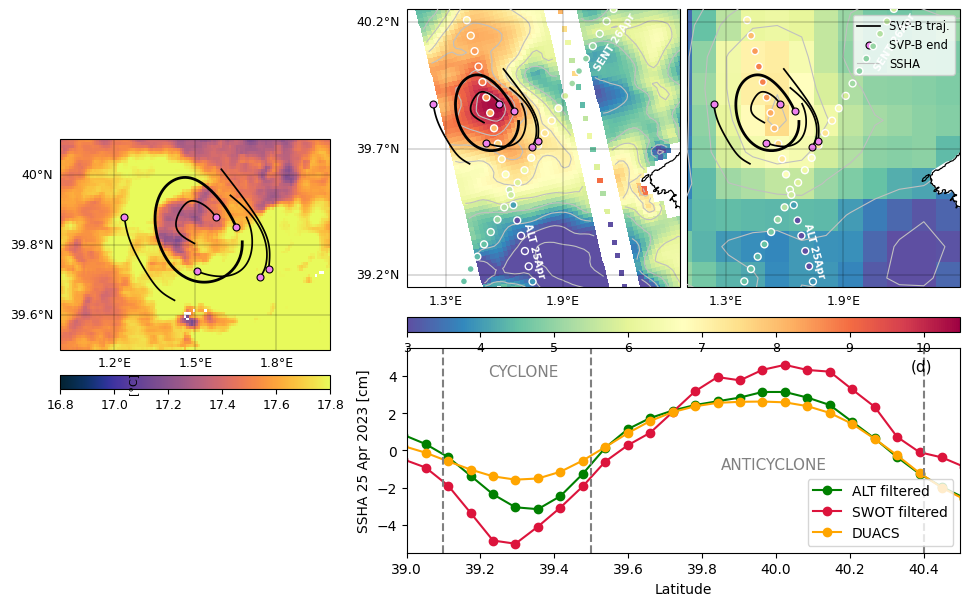

In [27]:
# Define the figure and grid
fig = plt.figure(figsize=(9, 8))
gs = gridspec.GridSpec(2, 3, width_ratios=[1, 2, 2], height_ratios=[2, 1], wspace=0.03, hspace=0.007)  
fontsize = 9

# Set extent of the map
extent = [1.1, 2.5, 39.15, 40.25]

# ####### AX1 #######
ax1 = fig.add_axes([-0.1, 0.3, 0.3, 0.4], projection=ccrs.Mercator())  # (left, bottom, width, height)
ax1.set_extent([1, 2, 39.5, 40.1])


coast = cf.GSHHSFeature(scale='full')
ax1.add_feature(coast, zorder=2001, linewidth=0.8)
ax1.add_feature(cf.LAND, zorder=2000, edgecolor='white', facecolor='white')

gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0.2, color='black', zorder=1999)
gl.xlocator = mticker.FixedLocator([1.2, 1.5, 1.8])
gl.ylocator = mticker.FixedLocator([39.6, 39.8, 40])
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 9, 'color': 'black'}
gl.ylabel_style = {'size': 9, 'color': 'black'}

plot1 = ax1.pcolormesh(lon_SST, lat_SST, SST - 273.15, transform=ccrs.PlateCarree(), cmap=cmocean.cm.thermal, vmin=16.8, vmax=17.8, zorder=0)

# Drifters
dd1 = str(ds_SWOT.time[10][40].values - np.timedelta64(3, 'D'))
dd2 = str(ds_SWOT.time[10][40].values + np.timedelta64(3, 'D'))

# Plot trajectory segments
for ii, ds in enumerate(ds_svp_leg1[1:]):
    ds_s = ds.sel(time=slice(dd1, dd2))
    if ds_s.time.size == 0:
        print('No trajectory segment on these days')
    else:
        color = 'black'  # Change drifter color to a more distinct one
        ax1.plot(ds_s.LON, ds_s.LAT, linewidth=1.25, transform=ccrs.PlateCarree(), color=color, zorder=500, label='SVP-B traj.' if ii == 2 else '')
        ax1.scatter(ds_s.LON[-1].values, ds_s.LAT[-1].values, s=25, color='violet', edgecolor='black', zorder=500, linewidths=0.8, transform=ccrs.PlateCarree())

# Plot the svp 35 in another color
ds_s = ds_svp_leg1[0].sel(time=slice(dd1, dd2))
ax1.plot(ds_s.LON, ds_s.LAT, linewidth=2, transform=ccrs.PlateCarree(), color='black', zorder=500, label='SVP-B traj. 35')
ax1.scatter(ds_s.LON[-1].values, ds_s.LAT[-1].values, s=25, color='violet', edgecolor='black', zorder=500, linewidths=0.8, label='SVP-B end', transform=ccrs.PlateCarree())

# Add horizontal colorbar for ax1
cbar1 = plt.colorbar(plot1, ax=ax1, orientation='horizontal', fraction=0.08, pad=0.08)
cbar1.ax.text(17.05, -0.25, '[°C]', fontsize=fontsize - 1, rotation=90)
cbar1.ax.tick_params(labelsize=fontsize)
# cbar1.set_ticks([17.2, 17.55, 17.9])

# ####### AX2 #######
ax2 = plt.subplot(gs[0:1, 1], projection=ccrs.Mercator())
ax2.set_extent(extent)
ax2.add_feature(coast, zorder=2001, linewidth=0.8)
ax2.add_feature(cf.LAND, zorder=2000, edgecolor='white', facecolor='white')

gl = ax2.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0.2, color='black', zorder=1999)
gl.xlocator = mticker.FixedLocator([1.3, 1.9, 2.5])
gl.ylocator = mticker.FixedLocator([39.2, 39.7, 40.2])
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 9, 'color': 'black'}
gl.ylabel_style = {'size': 9, 'color': 'black'}

plot2 = ax2.pcolormesh(ds_SWOT.longitude, ds_SWOT.latitude, ds_SWOT.ssha_noiseless * 100,
                       transform=ccrs.PlateCarree(), vmin=3, vmax=10.5, cmap='Spectral_r')

# PLOT ALTIKA
ax2.scatter(lon_ALT, lat_ALT, 25,  c=sla_filtered_ALT* 100, transform=ccrs.PlateCarree(), vmin=3, vmax=10, cmap='Spectral_r', zorder=500, edgecolors='white')
# PLO SENTINEL
ax2.scatter(lon_sent, lat_sent, 25,  c=sla_filtered_sent* 100, transform=ccrs.PlateCarree(), vmin=3, vmax=10, cmap='Spectral_r', zorder=500, edgecolors='white')

CS = ax2.contour(ds_SWOT.longitude, ds_SWOT.latitude, ds_SWOT.ssha_noiseless * 100, colors='silver', linewidths=0.8, vmin=0, vmax=10, levels=np.linspace(0, 10, 11), transform=ccrs.PlateCarree(), zorder=6)

# Drifters
for ii, ds in enumerate(ds_svp_leg1[1:]):
    ds_s = ds.sel(time=slice(dd1, dd2))
    if ds_s.time.size == 0:
        print('No trajectory segment on these days')
    else:
        color = 'black'  # Change drifter color to a more distinct one
        ax2.plot(ds_s.LON, ds_s.LAT, linewidth=1.25, transform=ccrs.PlateCarree(), color=color, zorder=500, label='SVP-B traj.' if ii == 2 else '')
        ax2.scatter(ds_s.LON[-1].values, ds_s.LAT[-1].values, s=25, color='violet', edgecolor='black', zorder=500, linewidths=0.8, transform=ccrs.PlateCarree())

# Plot the svp 35 in another color
ds_s = ds_svp_leg1[0].sel(time=slice(dd1, dd2))
ax2.plot(ds_s.LON, ds_s.LAT, linewidth=2, transform=ccrs.PlateCarree(), color='black', zorder=500)
ax2.scatter(ds_s.LON[-1].values, ds_s.LAT[-1].values, s=25, color='violet', edgecolor='black', zorder=500, linewidths=0.8, label='SVP-B end', transform=ccrs.PlateCarree())


# ####### AX3 #######
ax3 = plt.subplot(gs[0, 2], projection=ccrs.Mercator())
ax3.set_extent(extent)
ax3.add_feature(coast, zorder=2001, linewidth=0.8)
ax3.add_feature(cf.LAND, zorder=2000, edgecolor='white', facecolor='white')

gl = ax3.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0.2, color='black', zorder=1999)
gl.xlocator = mticker.FixedLocator([1.3, 1.9, 2.5])
gl.ylocator = mticker.FixedLocator([39.2, 39.7, 40.2])
gl.top_labels = False
gl.right_labels = False
gl.left_labels = False
gl.xlabel_style = {'size': 9, 'color': 'black'}
gl.ylabel_style = {'size': 9, 'color': 'black'}

plot3 = ax3.pcolormesh(lon_DUACS, lat_DUACS, ds_DUACS.sla.squeeze() * 100,
                       transform=ccrs.PlateCarree(), vmin=3, vmax=10, cmap='Spectral_r')

# DUACS contours
CS3 = ax3.contour(lon_DUACS, lat_DUACS, ds_DUACS.sla.squeeze() * 100, colors='silver', linewidths=0.8, vmin=0, vmax=10, levels=np.linspace(0, 10, 11), transform=ccrs.PlateCarree(), zorder=5, label= 'SSHA')

# Add proxy artist for the legend
contour_legend = Line2D([0], [0], color='silver', linewidth=0.8, label='SSHA')

# PLOT ALTIKA
ax3.scatter(lon_ALT, lat_ALT, 25,  c=sla_filtered_ALT* 100, transform=ccrs.PlateCarree(), vmin=3, vmax=10, cmap='Spectral_r', zorder=500, edgecolors='white')
# PLOT SENTINEL
ax3.scatter(lon_sent, lat_sent, 25,  c=sla_filtered_sent* 100, transform=ccrs.PlateCarree(), vmin=3, vmax=10, cmap='Spectral_r', zorder=500, edgecolors='white')

# add text "ALT" and "SENT"
ax2.text(1.69, 39.19, 'ALT 25Apr', fontsize=7.2, color='w', fontweight ='bold', transform=ccrs.PlateCarree(), rotation = 285, zorder=1000)
ax2.text(2.05, 40.01, 'SENT 26Apr', fontsize=7.2, color='w', fontweight ='bold',transform=ccrs.PlateCarree(), rotation = 57, zorder=1000)

# add text "ALT" and "SENT"
ax3.text(1.69, 39.19, 'ALT 25Apr', fontsize=7.2, color='w', fontweight ='bold', transform=ccrs.PlateCarree(), rotation = 285, zorder=1000)
ax3.text(2.05, 40.01, 'SENT 26Apr', fontsize=7.2, color='w', fontweight ='bold',transform=ccrs.PlateCarree(), rotation = 57, zorder=1000)

# Drifters for ax3
for ii, ds in enumerate(ds_svp_leg1[1:]):
    ds_s = ds.sel(time=slice(dd1, dd2))
    if ds_s.time.size == 0:
        print('No trajectory segment on these days')
    else:
        color = 'black'  # Change drifter color to a more distinct one
        ax3.plot(ds_s.LON, ds_s.LAT, linewidth=1.25, transform=ccrs.PlateCarree(), color=color, zorder=500, label='SVP-B traj.' if ii == 2 else '')
        ax3.scatter(ds_s.LON[-1].values, ds_s.LAT[-1].values, s=25, color='violet', edgecolor='black', zorder=500, linewidths=0.8, transform=ccrs.PlateCarree())

# Plot the svp 35 in another color
ds_s = ds_svp_leg1[0].sel(time=slice(dd1, dd2))
ax3.plot(ds_s.LON, ds_s.LAT, linewidth=2, transform=ccrs.PlateCarree(), color='black', zorder=500)
ax3.scatter(ds_s.LON[-1].values, ds_s.LAT[-1].values, s=25, color='violet', edgecolor='black', zorder=500, linewidths=0.8, label='SVP-B end', transform=ccrs.PlateCarree())


# Create custom legend entries
handles, labels = ax3.get_legend_handles_labels()

# Append SSHA proxy entry
handles.append(contour_legend)
labels.append('SSHA')

# Legend for ax2
ax3.legend(handles=handles, labels=labels, loc='upper right', fontsize=fontsize - 0.7, facecolor='white')


# ####### AX4 #######
ax4 = plt.subplot(gs[1, 1:3])  # This spans the second row
plt.plot(lat_ALT, (sla_filtered_ALT - np.nanmean(sla_filtered_ALT)) * 100, '-o', c='green', label='ALT filtered')
plt.plot(lat_ALT, (ssha_swot_interp - np.nanmean(ssha_swot_interp)) * 100, '-o', c='crimson', label='SWOT filtered')
plt.plot(lat_ALT, (ssha_duacs_interp - np.nanmean(ssha_duacs_interp)) * 100, '-o', c='orange', label='DUACS')

plt.xlim([39, 40.5])
plt.xlabel('Latitude')
plt.ylabel('SSHA 25 Apr 2023 [cm]')

plt.axvline(x=39.1, color='gray', linestyle='--')
plt.axvline(x=39.5, color='gray', linestyle='--')
plt.axvline(x=40.4, color='gray', linestyle='--')

plt.text(39.22, 4, 'CYCLONE', c='gray', fontsize=11)
plt.text(39.85, -1, 'ANTICYCLONE', c='gray', fontsize=11)

plt.legend(loc='lower right')
plt.ylim([-5.5, 5.5])

# Add label to indicate the subplot
ax4.text(0.95, 0.95, '(d)', transform=ax4.transAxes, fontsize=fontsize + 2, va='top', ha='right', zorder=1000)

# Final adjustments for colorbars
# cbar = plt.colorbar(plot3, ax=[ax2, ax3], orientation='vertical', fraction=0.024, pad=0.02)
cbar = plt.colorbar(plot2, ax=[ax2, ax3], orientation='horizontal', fraction=0.07, pad=0.073, aspect=38)

cbar.ax.tick_params(labelsize=fontsize)
cbar.set_ticks([3, 4, 5, 6, 7, 8, 9, 10])

# reduce vertical space between subplots
# plt.subplots_adjust(wspace=0.3)
# plt.tight_layout()

plt.show()

llevar el mateix promig de la secció al mapa

altika 7 km resol, filtrat a 42 km

swot 2 km, filtrat a 5


/home/everger/anaconda3/lib/python3.11/site-packages/cartopy/mpl/geoaxes.py:1604: UserWarning: The following kwargs were not used by contour: 'label'
  result = super().contour(*args, **kwargs)


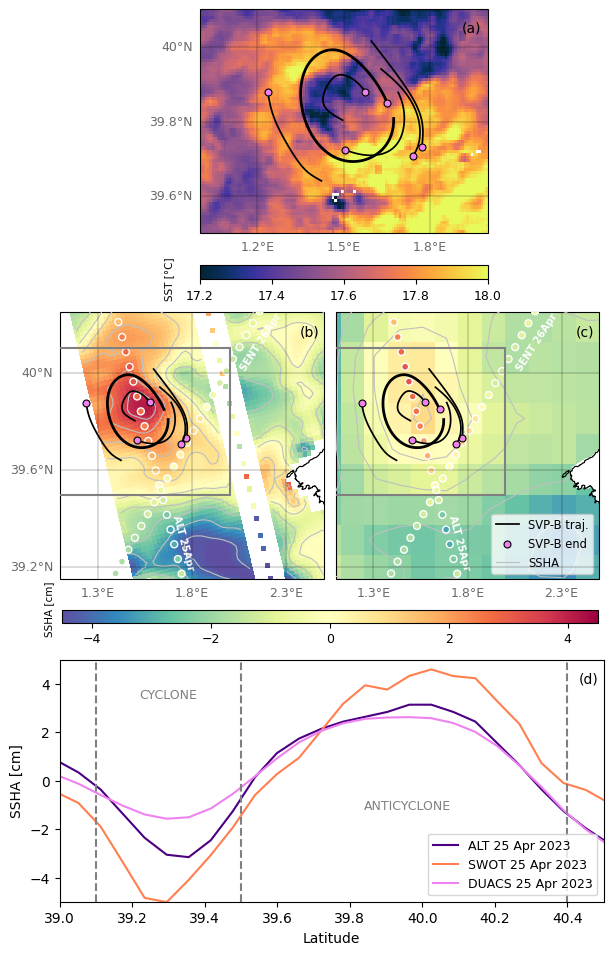

In [28]:
# Define the figure and grid
fig = plt.figure(figsize=(8, 11))  # Increase figure height to maintain consistency
gs = gridspec.GridSpec(3, 2, width_ratios=[1, 1], height_ratios=[1, 1.4, 1], wspace=-0.2, hspace=0.18)  
fontsize = 9

# Set extent of the map
extent = [1.1, 2.5, 39.15, 40.25]

# ####### AX1 #######
# ax1 = fig.add_subplot(gs[0, 1], projection=ccrs.Mercator())  # (first row, second column)
ax1 = fig.add_axes([0.35, 0.65, 0.36, 0.36], projection=ccrs.Mercator())  # (left, bottom, width, height)

ax1.set_extent([1, 2, 39.5, 40.1])

coast = cf.GSHHSFeature(scale='full')
ax1.add_feature(coast, zorder=2001, linewidth=0.8)
ax1.add_feature(cf.LAND, zorder=2000, edgecolor='white', facecolor='white')

gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0.2, color='black', zorder=1999)
gl.xlocator = mticker.FixedLocator([1.2, 1.5, 1.8])
gl.ylocator = mticker.FixedLocator([39.6, 39.8, 40])
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': fontsize, 'color': 'dimgray'}
gl.ylabel_style = {'size': fontsize, 'color': 'dimgray'}

plot1 = ax1.pcolormesh(lon_SST, lat_SST, SST - 273.15, transform=ccrs.PlateCarree(), cmap=cmocean.cm.thermal, vmin=17.2, vmax=18, zorder=0)

# Drifters
dd1 = str(ds_SWOT.time[10][40].values - np.timedelta64(3, 'D'))
dd2 = str(ds_SWOT.time[10][40].values + np.timedelta64(3, 'D'))

# Plot trajectory segments
for ii, ds in enumerate(ds_svp_leg1[1:]):
    ds_s = ds.sel(time=slice(dd1, dd2))
    if ds_s.time.size == 0:
        print('No trajectory segment on these days')
    else:
        color = 'black'  # Change drifter color to a more distinct one
        ax1.plot(ds_s.LON, ds_s.LAT, linewidth=1.25, transform=ccrs.PlateCarree(), color=color, zorder=500, label='SVP-B traj.' if ii == 2 else '')
        ax1.scatter(ds_s.LON[-1].values, ds_s.LAT[-1].values, s=25, color='violet', edgecolor='black', zorder=500, linewidths=0.8, transform=ccrs.PlateCarree())

# Plot the svp 35 in another color
ds_s = ds_svp_leg1[0].sel(time=slice(dd1, dd2))
ax1.plot(ds_s.LON, ds_s.LAT, linewidth=2, transform=ccrs.PlateCarree(), color='black', zorder=500, label='SVP-B traj. 35')
ax1.scatter(ds_s.LON[-1].values, ds_s.LAT[-1].values, s=25, color='violet', edgecolor='black', zorder=500, linewidths=0.8, label='SVP-B end', transform=ccrs.PlateCarree())

# Add horizontal colorbar for ax1
cbar1 = plt.colorbar(plot1, ax=ax1, orientation='horizontal', fraction=0.08, pad=0.08)
cbar1.ax.text(17.1, -1.3, 'SST [°C]', fontsize=fontsize-1.5, rotation=90)

cbar1.ax.tick_params(labelsize=fontsize)

# ####### AX2 #######
ax2 = fig.add_subplot(gs[1, 0], projection=ccrs.Mercator())  # (second row, first column)
ax2.set_extent(extent)
ax2.add_feature(coast, zorder=2001, linewidth=0.8)
ax2.add_feature(cf.LAND, zorder=2000, edgecolor='white', facecolor='white')

gl = ax2.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0.2, color='black', zorder=1999)
gl.xlocator = mticker.FixedLocator([1.3, 1.8, 2.3])
gl.ylocator = mticker.FixedLocator([39.2, 39.6, 40])
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': fontsize, 'color': 'dimgray'}
gl.ylabel_style = {'size': fontsize, 'color': 'dimgray'}

plot2 = ax2.pcolormesh(ds_SWOT.longitude, ds_SWOT.latitude, (ds_SWOT.ssha_noiseless - np.nanmean(ssha_swot_interp))* 100,
                       transform=ccrs.PlateCarree(), vmin=-4.5, vmax=4.5, cmap='Spectral_r')

# PLOT ALTIKA
ax2.scatter(lon_ALT, lat_ALT, 25,  c=(sla_filtered_ALT- np.nanmean(sla_filtered_ALT))* 100, transform=ccrs.PlateCarree(), vmin=-4.5, vmax=4.5, cmap='Spectral_r', zorder=500, edgecolors='white')
# PLOT SENTINEL
ax2.scatter(lon_sent, lat_sent, 25,  c=(sla_filtered_sent- np.nanmean(sla_filtered_sent))* 100, transform=ccrs.PlateCarree(), vmin=-4.5, vmax=4.5, cmap='Spectral_r', zorder=500, edgecolors='white')

CS = ax2.contour(ds_SWOT.longitude, ds_SWOT.latitude, ds_SWOT.ssha_noiseless * 100, colors='silver', linewidths=0.8, vmin=0, vmax=10, levels=np.linspace(0, 10, 11), transform=ccrs.PlateCarree(), zorder=6)

# Drifters
for ii, ds in enumerate(ds_svp_leg1[1:]):
    ds_s = ds.sel(time=slice(dd1, dd2))
    if ds_s.time.size == 0:
        print('No trajectory segment on these days')
    else:
        color = 'black'  # Change drifter color to a more distinct one
        ax2.plot(ds_s.LON, ds_s.LAT, linewidth=1.25, transform=ccrs.PlateCarree(), color=color, zorder=500, label='SVP-B traj.' if ii == 2 else '')
        ax2.scatter(ds_s.LON[-1].values, ds_s.LAT[-1].values, s=25, color='violet', edgecolor='black', zorder=500, linewidths=0.8, transform=ccrs.PlateCarree())

# Plot the svp 35 in another color
ds_s = ds_svp_leg1[0].sel(time=slice(dd1, dd2))
ax2.plot(ds_s.LON, ds_s.LAT, linewidth=2, transform=ccrs.PlateCarree(), color='black', zorder=500)

# add text "ALT" and "SENT"
ax2.text(1.69, 39.19, 'ALT 25Apr', fontsize=7.2, color='w', fontweight ='bold', transform=ccrs.PlateCarree(), rotation = 285, zorder=1000)
ax2.text(2.05, 40.01, 'SENT 26Apr', fontsize=7.2, color='w', fontweight ='bold',transform=ccrs.PlateCarree(), rotation = 57, zorder=1000)

# add box in the map to indicate the cyclone with the correct projection
from matplotlib.patches import Rectangle
ax2.add_patch(Rectangle((1, 39.5), 1, 0.6, fill=None, edgecolor='gray', lw=1.5, transform=ccrs.PlateCarree(), zorder=2000))


# ####### AX3 #######
ax3 = fig.add_subplot(gs[1, 1], projection=ccrs.Mercator())  # (second row, second column)
ax3.set_extent(extent)
ax3.add_feature(coast, zorder=2001, linewidth=0.8)
ax3.add_feature(cf.LAND, zorder=2000, edgecolor='white', facecolor='white')

gl = ax3.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0.2, color='black', zorder=1999)
gl.xlocator = mticker.FixedLocator([1.3, 1.8, 2.3])
gl.ylocator = mticker.FixedLocator([39.2, 39.6, 40])
gl.top_labels = False
gl.right_labels = False
gl.left_labels = False
gl.xlabel_style = {'size': fontsize, 'color': 'dimgray'}
gl.ylabel_style = {'size': fontsize, 'color': 'dimgray'}

plot3 = ax3.pcolormesh(lon_DUACS, lat_DUACS, (ds_DUACS.sla.squeeze()- np.nanmean(ssha_duacs_interp)) * 100,
                       transform=ccrs.PlateCarree(), vmin=-4.5, vmax=4.5, cmap='Spectral_r')

# DUACS contours
CS3 = ax3.contour(lon_DUACS, lat_DUACS, ds_DUACS.sla.squeeze() * 100, colors='silver', linewidths=0.8, vmin=0, vmax=10, levels=np.linspace(0, 10, 11), transform=ccrs.PlateCarree(), zorder=5, label= 'SSHA')

# Add proxy artist for the legend
from matplotlib.lines import Line2D
contour_legend = Line2D([0], [0], color='silver', linewidth=0.8, label='SSHA')

# PLOT ALTIKA
ax3.scatter(lon_ALT, lat_ALT, 25,  c=(sla_filtered_ALT- np.nanmean(sla_filtered_ALT))* 100, transform=ccrs.PlateCarree(), vmin=-4.5, vmax=4.5, cmap='Spectral_r', zorder=500, edgecolors='white')
# PLOT SENTINEL
ax3.scatter(lon_sent, lat_sent, 25,  c=(sla_filtered_sent- np.nanmean(sla_filtered_sent))* 100, transform=ccrs.PlateCarree(), vmin=-4.5, vmax=4.5, cmap='Spectral_r', zorder=500, edgecolors='white')

# add text "ALT" and "SENT"
ax3.text(1.69, 39.19, 'ALT 25Apr', fontsize=7.2, color='w', fontweight ='bold', transform=ccrs.PlateCarree(), rotation = 285, zorder=1000)
ax3.text(2.05, 40.01, 'SENT 26Apr', fontsize=7.2, color='w', fontweight ='bold',transform=ccrs.PlateCarree(), rotation = 57, zorder=1000)

ax3.add_patch(Rectangle((1, 39.5), 1, 0.6, fill=None, edgecolor='gray', lw=1.5, transform=ccrs.PlateCarree(), zorder=2000))

# Drifters for ax3
for ii, ds in enumerate(ds_svp_leg1[1:]):
    ds_s = ds.sel(time=slice(dd1, dd2))
    if ds_s.time.size == 0:
        print('No trajectory segment on these days')
    else:
        color = 'black'  # Change drifter color to a more distinct one
        ax3.plot(ds_s.LON, ds_s.LAT, linewidth=1.25, transform=ccrs.PlateCarree(), color=color, zorder=500, label='SVP-B traj.' if ii == 2 else '')
        ax3.scatter(ds_s.LON[-1].values, ds_s.LAT[-1].values, s=25, color='violet', edgecolor='black', zorder=500, linewidths=0.8, transform=ccrs.PlateCarree())

# Plot the svp 35 in another color
ds_s = ds_svp_leg1[0].sel(time=slice(dd1, dd2))
ax3.plot(ds_s.LON, ds_s.LAT, linewidth=2, transform=ccrs.PlateCarree(), color='black', zorder=500)
ax3.scatter(ds_s.LON[-1].values, ds_s.LAT[-1].values, s=25, color='violet', edgecolor='black', zorder=500, linewidths=0.8, label='SVP-B end', transform=ccrs.PlateCarree())


# Create custom legend entries
handles, labels = ax3.get_legend_handles_labels()

# Append SSHA proxy entry
handles.append(contour_legend)
labels.append('SSHA')

# Legend for ax2
ax3.legend(handles=handles, labels=labels, loc='lower right', fontsize=fontsize - 0.7, facecolor='white')


# ####### AX4 #######
# ax4 = fig.add_subplot(gs[2, :])  # (third row, spans all columns)
ax4 = fig.add_axes([0.175, 0.1, 0.68, 0.22])  # (left, bottom, width, height)

plt.plot(lat_ALT, (sla_filtered_ALT - np.nanmean(sla_filtered_ALT)) * 100, '-', c='indigo', label='ALT 25 Apr 2023')
plt.plot(lat_ALT, (ssha_swot_interp - np.nanmean(ssha_swot_interp)) * 100, '-', c='coral', label='SWOT 25 Apr 2023')
plt.plot(lat_ALT, (ssha_duacs_interp - np.nanmean(ssha_duacs_interp)) * 100, '-', c='violet', label='DUACS 25 Apr 2023')

plt.xlim([39, 40.5])
plt.xlabel('Latitude')
plt.ylabel('SSHA [cm]')

plt.axvline(x=39.1, color='gray', linestyle='--')
plt.axvline(x=39.5, color='gray', linestyle='--')
plt.axvline(x=40.4, color='gray', linestyle='--')

plt.text(39.22, 3.4, 'CYCLONE', c='gray', fontsize=fontsize)
plt.text(39.84, -1.2, 'ANTICYCLONE', c='gray', fontsize=fontsize)

plt.legend(loc='lower right', fontsize=fontsize)
plt.ylim([-5, 5])

# Add label to indicate the subplot
ax1.text(0.91, 0.95, '(a)', transform=ax1.transAxes, fontsize=fontsize + 1, va='top', zorder=1000)
ax2.text(0.91, 0.95, '(b)', transform=ax2.transAxes, fontsize=fontsize + 1, va='top', zorder=1000)
ax3.text(0.91, 0.95, '(c)', transform=ax3.transAxes, fontsize=fontsize + 1, va='top', zorder=1000)
ax4.text(0.99, 0.95, '(d)', transform=ax4.transAxes, fontsize=fontsize + 1, va='top', ha='right', zorder=1000)

# Final adjustments for colorbars
cbar = plt.colorbar(plot2, ax=[ax2, ax3], orientation='horizontal', fraction=0.04, pad=0.1, aspect=43)
cbar.ax.tick_params(labelsize=fontsize)
cbar.set_ticks([-4, -2, 0, 2, 4])
cbar.ax.text(-4.8, -0.9, 'SSHA [cm]', fontsize=fontsize-1.5, rotation=90)

# 
# Adjust layout for equal subplot sizes
# plt.tight_layout()
# plt.savefig('/home/everger/ONEDRIVE/SWOT/grl_codes/figure2_with_along_tr_new2.png', dpi=300, bbox_inches='tight')
plt.show()

In [29]:
# remove nans in ds_SWOT.ugos
ugos = ds_SWOT.ugos.where(np.isfinite(ds_SWOT.ugos), 0)
vgos = ds_SWOT.vgos.where(np.isfinite(ds_SWOT.vgos), 0)

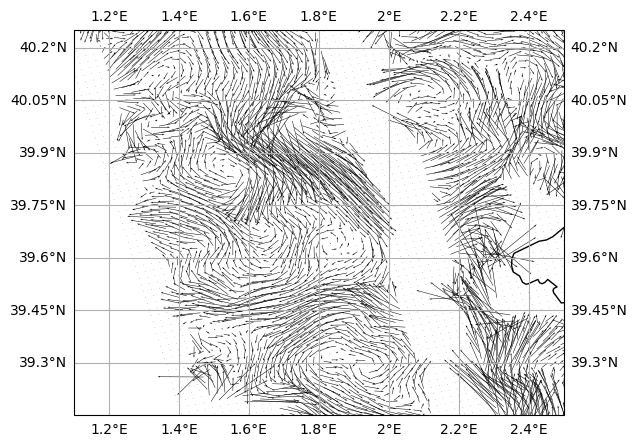

In [30]:
# Create a figure with GeoAxes (not regular plt.figure)
fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection=ccrs.PlateCarree())  # Set map projection

# Plot quiver with transform specified
ax.quiver(ds_SWOT.longitude, ds_SWOT.latitude,
          ugos, vgos,
          scale=3.5, color='black', width=0.001,
          transform=ccrs.PlateCarree())

ax.set_extent(extent)  # Set extent of the map

# Optional: add coastlines or gridlines
ax.coastlines()
ax.gridlines(draw_labels=True)


In [31]:
ugos_duacs = ds_DUACS.ugos.squeeze()  # shape becomes (24, 32)
vgos_duacs = ds_DUACS.vgos.squeeze()  # shape becomes (24, 32)

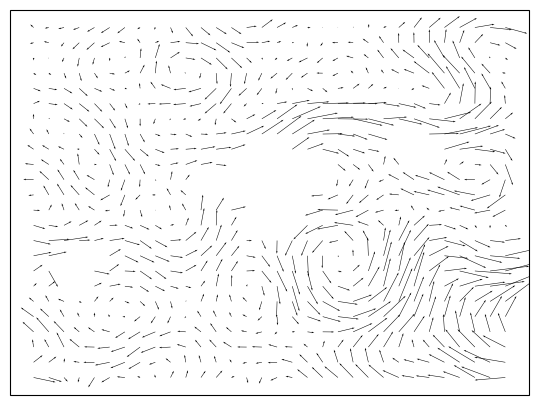

In [32]:

# Create a figure with GeoAxes (not regular plt.figure)
fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection=ccrs.PlateCarree())  # Set map projection

# Plot quiver with transform specified
ax.quiver(lon_DUACS, lat_DUACS, 
          ugos_duacs, vgos_duacs,
          scale=3.5, color='black', width=0.001,
          transform=ccrs.PlateCarree())

/home/everger/anaconda3/lib/python3.11/site-packages/cartopy/mpl/geoaxes.py:1604: UserWarning: The following kwargs were not used by contour: 'label'
  result = super().contour(*args, **kwargs)


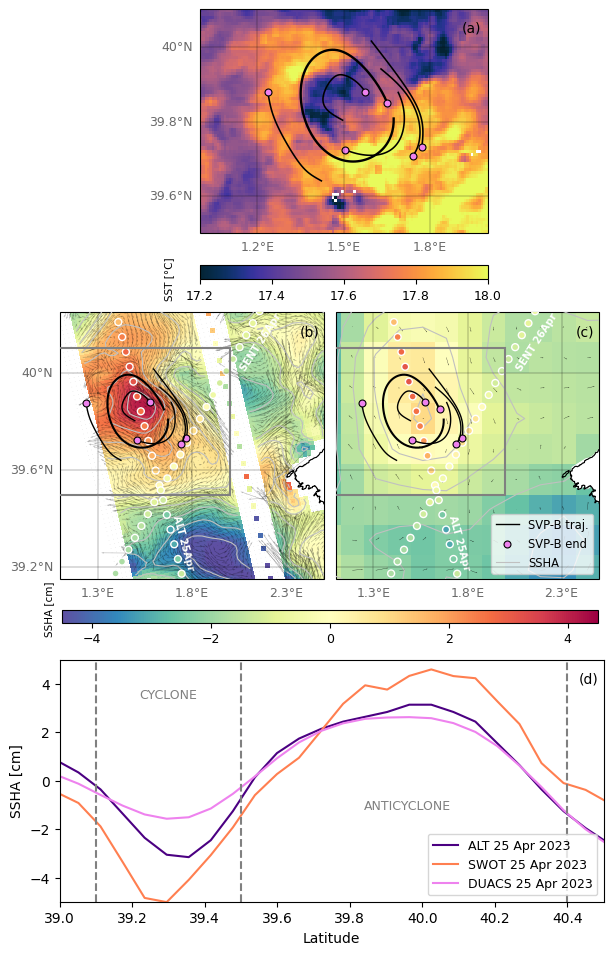

In [38]:
# Define the figure and grid
fig = plt.figure(figsize=(8, 11))  # Increase figure height to maintain consistency
gs = gridspec.GridSpec(3, 2, width_ratios=[1, 1], height_ratios=[1, 1.4, 1], wspace=-0.2, hspace=0.18)  
fontsize = 9

# Set extent of the map
extent = [1.1, 2.5, 39.15, 40.25]

# ####### AX1 #######
# ax1 = fig.add_subplot(gs[0, 1], projection=ccrs.Mercator())  # (first row, second column)
ax1 = fig.add_axes([0.35, 0.65, 0.36, 0.36], projection=ccrs.Mercator())  # (left, bottom, width, height)

ax1.set_extent([1, 2, 39.5, 40.1])

coast = cf.GSHHSFeature(scale='full')
ax1.add_feature(coast, zorder=2001, linewidth=0.8)
ax1.add_feature(cf.LAND, zorder=2000, edgecolor='white', facecolor='white')

gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0.2, color='black', zorder=1999)
gl.xlocator = mticker.FixedLocator([1.2, 1.5, 1.8])
gl.ylocator = mticker.FixedLocator([39.6, 39.8, 40])
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': fontsize, 'color': 'dimgray'}
gl.ylabel_style = {'size': fontsize, 'color': 'dimgray'}

plot1 = ax1.pcolormesh(lon_SST, lat_SST, SST - 273.15, transform=ccrs.PlateCarree(), cmap=cmocean.cm.thermal, vmin=17.2, vmax=18, zorder=0)

# Drifters
dd1 = str(ds_SWOT.time[10][40].values - np.timedelta64(3, 'D'))
dd2 = str(ds_SWOT.time[10][40].values + np.timedelta64(3, 'D'))

# Plot trajectory segments
for ii, ds in enumerate(ds_svp_leg1[1:]):
    ds_s = ds.sel(time=slice(dd1, dd2))
    if ds_s.time.size == 0:
        print('No trajectory segment on these days')
    else:
        color = 'black'  # Change drifter color to a more distinct one
        ax1.plot(ds_s.LON, ds_s.LAT, linewidth=1.15, transform=ccrs.PlateCarree(), color=color, zorder=500, label='SVP-B traj.' if ii == 2 else '')
        ax1.scatter(ds_s.LON[-1].values, ds_s.LAT[-1].values, s=25, color='violet', edgecolor='black', zorder=500, linewidths=0.8, transform=ccrs.PlateCarree())

# Plot the svp 35 in another color
ds_s = ds_svp_leg1[0].sel(time=slice(dd1, dd2))
ax1.plot(ds_s.LON, ds_s.LAT, linewidth=1.7, transform=ccrs.PlateCarree(), color='black', zorder=500, label='SVP-B traj. 35')
ax1.scatter(ds_s.LON[-1].values, ds_s.LAT[-1].values, s=25, color='violet', edgecolor='black', zorder=500, linewidths=0.8, label='SVP-B end', transform=ccrs.PlateCarree())

# Add horizontal colorbar for ax1
cbar1 = plt.colorbar(plot1, ax=ax1, orientation='horizontal', fraction=0.08, pad=0.08)
cbar1.ax.text(17.1, -1.3, 'SST [°C]', fontsize=fontsize-1.5, rotation=90)

cbar1.ax.tick_params(labelsize=fontsize)

# ####### AX2 #######
ax2 = fig.add_subplot(gs[1, 0], projection=ccrs.Mercator())  # (second row, first column)
ax2.set_extent(extent)
ax2.add_feature(coast, zorder=2001, linewidth=0.8)
ax2.add_feature(cf.LAND, zorder=2000, edgecolor='white', facecolor='white')

gl = ax2.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0.2, color='black', zorder=1999)
gl.xlocator = mticker.FixedLocator([1.3, 1.8, 2.3])
gl.ylocator = mticker.FixedLocator([39.2, 39.6, 40])
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': fontsize, 'color': 'dimgray'}
gl.ylabel_style = {'size': fontsize, 'color': 'dimgray'}

plot2 = ax2.pcolormesh(ds_SWOT.longitude, ds_SWOT.latitude, (ds_SWOT.ssha_noiseless - np.nanmean(ssha_swot_interp))* 100,
                       transform=ccrs.PlateCarree(), vmin=-4.5, vmax=4.5, cmap='Spectral_r')

# PLOT ALTIKA
ax2.scatter(lon_ALT, lat_ALT, 25,  c=(sla_filtered_ALT- np.nanmean(sla_filtered_ALT))* 100, transform=ccrs.PlateCarree(), vmin=-4.5, vmax=4.5, cmap='Spectral_r', zorder=500, edgecolors='white')
# PLOT SENTINEL
ax2.scatter(lon_sent, lat_sent, 25,  c=(sla_filtered_sent- np.nanmean(sla_filtered_sent))* 100, transform=ccrs.PlateCarree(), vmin=-4.5, vmax=4.5, cmap='Spectral_r', zorder=500, edgecolors='white')

CS = ax2.contour(ds_SWOT.longitude, ds_SWOT.latitude, ds_SWOT.ssha_noiseless * 100, colors='silver', linewidths=0.8, vmin=0, vmax=10, levels=np.linspace(0, 10, 11), transform=ccrs.PlateCarree(), zorder=6)

# Drifters
for ii, ds in enumerate(ds_svp_leg1[1:]):
    ds_s = ds.sel(time=slice(dd1, dd2))
    if ds_s.time.size == 0:
        print('No trajectory segment on these days')
    else:
        color = 'black'  # Change drifter color to a more distinct one
        ax2.plot(ds_s.LON, ds_s.LAT, linewidth=1, transform=ccrs.PlateCarree(), color=color, zorder=500, label='SVP-B traj.' if ii == 2 else '')
        ax2.scatter(ds_s.LON[-1].values, ds_s.LAT[-1].values, s=25, color='violet', edgecolor='black', zorder=500, linewidths=0.8, transform=ccrs.PlateCarree())

# Plot the svp 35 in another color
ds_s = ds_svp_leg1[0].sel(time=slice(dd1, dd2))
ax2.plot(ds_s.LON, ds_s.LAT, linewidth=1.5, transform=ccrs.PlateCarree(), color='black', zorder=500)

# add text "ALT" and "SENT"
ax2.text(1.69, 39.19, 'ALT 25Apr', fontsize=7.2, color='w', fontweight ='bold', transform=ccrs.PlateCarree(), rotation = 285, zorder=1000)
ax2.text(2.05, 40.01, 'SENT 26Apr', fontsize=7.2, color='w', fontweight ='bold',transform=ccrs.PlateCarree(), rotation = 57, zorder=1000)

# add box in the map to indicate the cyclone with the correct projection
from matplotlib.patches import Rectangle
ax2.add_patch(Rectangle((1, 39.5), 1, 0.6, fill=None, edgecolor='gray', lw=1.5, transform=ccrs.PlateCarree(), zorder=2000))

# Plot quiver with transform specified
step = 1
ax2.quiver(ds_SWOT.longitude.values[::step, ::step],
           ds_SWOT.latitude.values[::step, ::step],
           ugos.values[::step, ::step],
           vgos.values[::step, ::step],
           scale=3, color='k', width=0.002,
           transform=ccrs.PlateCarree(), alpha = 0.3)

# ####### AX3 #######
ax3 = fig.add_subplot(gs[1, 1], projection=ccrs.Mercator())  # (second row, second column)
ax3.set_extent(extent)
ax3.add_feature(coast, zorder=2001, linewidth=0.8)
ax3.add_feature(cf.LAND, zorder=2000, edgecolor='white', facecolor='white')

gl = ax3.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0.2, color='black', zorder=1999)
gl.xlocator = mticker.FixedLocator([1.3, 1.8, 2.3])
gl.ylocator = mticker.FixedLocator([39.2, 39.6, 40])
gl.top_labels = False
gl.right_labels = False
gl.left_labels = False
gl.xlabel_style = {'size': fontsize, 'color': 'dimgray'}
gl.ylabel_style = {'size': fontsize, 'color': 'dimgray'}

plot3 = ax3.pcolormesh(lon_DUACS, lat_DUACS, (ds_DUACS.sla.squeeze()- np.nanmean(ssha_duacs_interp)) * 100,
                       transform=ccrs.PlateCarree(), vmin=-4.5, vmax=4.5, cmap='Spectral_r')

# DUACS contours
CS3 = ax3.contour(lon_DUACS, lat_DUACS, ds_DUACS.sla.squeeze() * 100, colors='silver', linewidths=0.8, vmin=0, vmax=10, levels=np.linspace(0, 10, 11), transform=ccrs.PlateCarree(), zorder=5, label= 'SSHA')

# Add proxy artist for the legend
from matplotlib.lines import Line2D
contour_legend = Line2D([0], [0], color='silver', linewidth=0.8, label='SSHA')

# PLOT ALTIKA
ax3.scatter(lon_ALT, lat_ALT, 25,  c=(sla_filtered_ALT- np.nanmean(sla_filtered_ALT))* 100, transform=ccrs.PlateCarree(), vmin=-4.5, vmax=4.5, cmap='Spectral_r', zorder=500, edgecolors='white')
# PLOT SENTINEL
ax3.scatter(lon_sent, lat_sent, 25,  c=(sla_filtered_sent- np.nanmean(sla_filtered_sent))* 100, transform=ccrs.PlateCarree(), vmin=-4.5, vmax=4.5, cmap='Spectral_r', zorder=500, edgecolors='white')

# add text "ALT" and "SENT"
ax3.text(1.69, 39.19, 'ALT 25Apr', fontsize=7.2, color='w', fontweight ='bold', transform=ccrs.PlateCarree(), rotation = 285, zorder=1000)
ax3.text(2.05, 40.01, 'SENT 26Apr', fontsize=7.2, color='w', fontweight ='bold',transform=ccrs.PlateCarree(), rotation = 57, zorder=1000)

ax3.add_patch(Rectangle((1, 39.5), 1, 0.6, fill=None, edgecolor='gray', lw=1.5, transform=ccrs.PlateCarree(), zorder=2000))

# Drifters for ax3
for ii, ds in enumerate(ds_svp_leg1[1:]):
    ds_s = ds.sel(time=slice(dd1, dd2))
    if ds_s.time.size == 0:
        print('No trajectory segment on these days')
    else:
        color = 'black'  # Change drifter color to a more distinct one
        ax3.plot(ds_s.LON, ds_s.LAT, linewidth=1, transform=ccrs.PlateCarree(), color=color, zorder=500, label='SVP-B traj.' if ii == 2 else '')
        ax3.scatter(ds_s.LON[-1].values, ds_s.LAT[-1].values, s=25, color='violet', edgecolor='black', zorder=500, linewidths=0.8, transform=ccrs.PlateCarree())

# Plot the svp 35 in another color
ds_s = ds_svp_leg1[0].sel(time=slice(dd1, dd2))
ax3.plot(ds_s.LON, ds_s.LAT, linewidth=1.5, transform=ccrs.PlateCarree(), color='black', zorder=500)
ax3.scatter(ds_s.LON[-1].values, ds_s.LAT[-1].values, s=25, color='violet', edgecolor='black', zorder=500, linewidths=0.8, label='SVP-B end', transform=ccrs.PlateCarree())


# Create custom legend entries
handles, labels = ax3.get_legend_handles_labels()

# Append SSHA proxy entry
handles.append(contour_legend)
labels.append('SSHA')

# Legend for ax2
ax3.legend(handles=handles, labels=labels, loc='lower right', fontsize=fontsize - 0.7, facecolor='white')

ax3.quiver(lon_DUACS, lat_DUACS, 
          ugos_duacs.values, vgos_duacs.values,
          scale=3.5, color='black', width=0.001,
          transform=ccrs.PlateCarree())


# ####### AX4 #######
# ax4 = fig.add_subplot(gs[2, :])  # (third row, spans all columns)
ax4 = fig.add_axes([0.175, 0.1, 0.68, 0.22])  # (left, bottom, width, height)

plt.plot(lat_ALT, (sla_filtered_ALT - np.nanmean(sla_filtered_ALT)) * 100, '-', c='indigo', label='ALT 25 Apr 2023')
plt.plot(lat_ALT, (ssha_swot_interp - np.nanmean(ssha_swot_interp)) * 100, '-', c='coral', label='SWOT 25 Apr 2023')
plt.plot(lat_ALT, (ssha_duacs_interp - np.nanmean(ssha_duacs_interp)) * 100, '-', c='violet', label='DUACS 25 Apr 2023')

plt.xlim([39, 40.5])
plt.xlabel('Latitude')
plt.ylabel('SSHA [cm]')

plt.axvline(x=39.1, color='gray', linestyle='--')
plt.axvline(x=39.5, color='gray', linestyle='--')
plt.axvline(x=40.4, color='gray', linestyle='--')

plt.text(39.22, 3.4, 'CYCLONE', c='gray', fontsize=fontsize)
plt.text(39.84, -1.2, 'ANTICYCLONE', c='gray', fontsize=fontsize)

plt.legend(loc='lower right', fontsize=fontsize)
plt.ylim([-5, 5])

# Add label to indicate the subplot
ax1.text(0.91, 0.95, '(a)', transform=ax1.transAxes, fontsize=fontsize + 1, va='top', zorder=1000)
ax2.text(0.91, 0.95, '(b)', transform=ax2.transAxes, fontsize=fontsize + 1, va='top', zorder=1000)
ax3.text(0.91, 0.95, '(c)', transform=ax3.transAxes, fontsize=fontsize + 1, va='top', zorder=1000)
ax4.text(0.99, 0.95, '(d)', transform=ax4.transAxes, fontsize=fontsize + 1, va='top', ha='right', zorder=1000)

# Final adjustments for colorbars
cbar = plt.colorbar(plot2, ax=[ax2, ax3], orientation='horizontal', fraction=0.04, pad=0.1, aspect=43)
cbar.ax.tick_params(labelsize=fontsize)
cbar.set_ticks([-4, -2, 0, 2, 4])
cbar.ax.text(-4.8, -0.9, 'SSHA [cm]', fontsize=fontsize-1.5, rotation=90)

plt.savefig('figure2_with_along_tr_with_vels_v2.png', dpi=300, bbox_inches='tight')